In [1]:
# Use if working in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Use if working in colab
# set working directory to project directory
%cd '/content/drive/My Drive/github/bicycles-seoul'

/content/drive/My Drive/github/bicycles-seoul


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [4]:
df = pd.read_csv('data/processed/01-bicycles-pollution-data.csv')

In [5]:
df.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,rented_bike_count,day,month,year,week_day,NO2,PM10,PM2.5
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,254,1,12,2017,4,0.017,17.0,9.0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,204,1,12,2017,4,0.018,19.0,11.0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,173,1,12,2017,4,0.016,15.0,13.0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,107,1,12,2017,4,0.015,19.0,13.0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,78,1,12,2017,4,0.016,13.0,7.0


In [6]:
df.dtypes

,0
Hour,int64
Temperature(C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64
Snowfall (cm),float64
Seasons,int64
Holiday,int64


In [7]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Hour,-0.001261,-1.203446
Temperature(C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378
Seasons,-0.048455,-1.323147
Holiday,-4.219538,15.808233


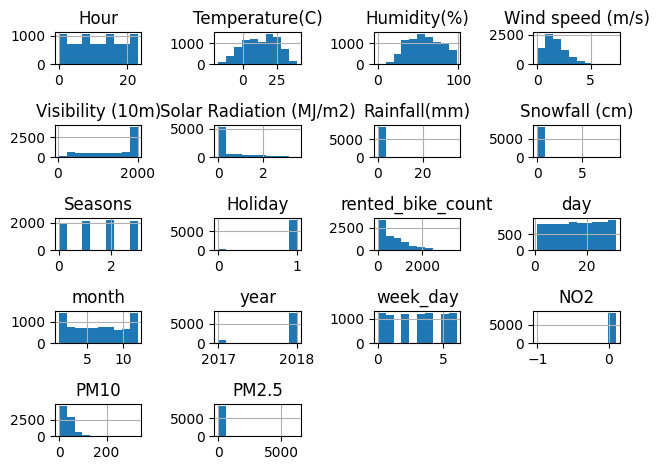

In [8]:
# Plot histograms for initial view of distribution
df.hist()
plt.tight_layout()

In [9]:
# Function for plotting hist, line, box for data fixing

def plotvar(df,var):
  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  df[var].hist(bins=50)

  plt.subplot(1,3,2)
  stats.probplot(df[var], dist='norm',plot=plt)

  plt.subplot(1,3,3)
  plt.boxplot(df[var],vert=False)

  plt.show()

# Handling temperature

Temperature looks acceptable, and the skewness and kurtosis were within normal range. Leave as it is.

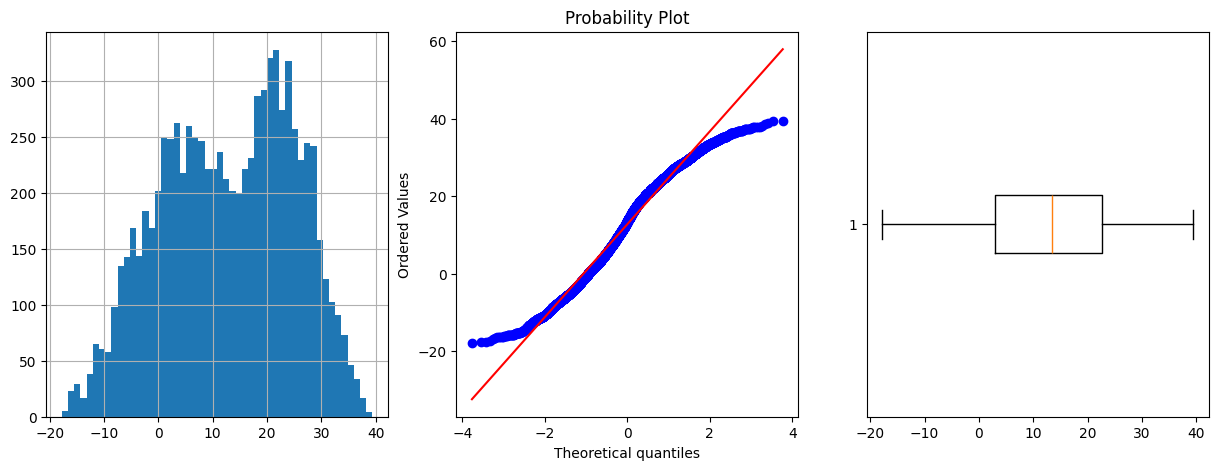

In [10]:
plotvar(df,'Temperature(C)')

# Handling humidity

Humidity also looks broadly fine.

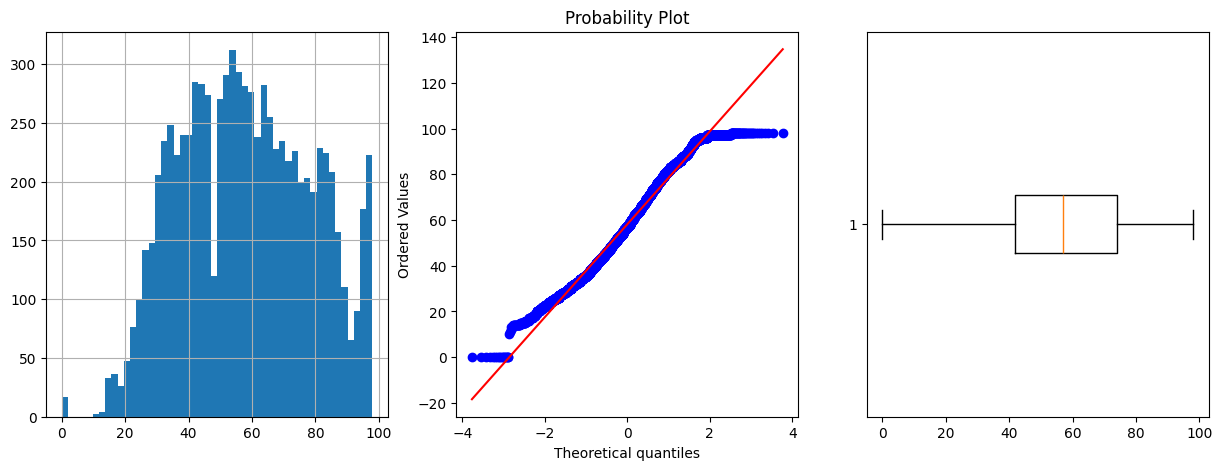

In [11]:
plotvar(df,'Humidity(%)')

# Handling wind speed

Wind speed has some positive skew, so this will need to be adjusted.

Square root transformation.

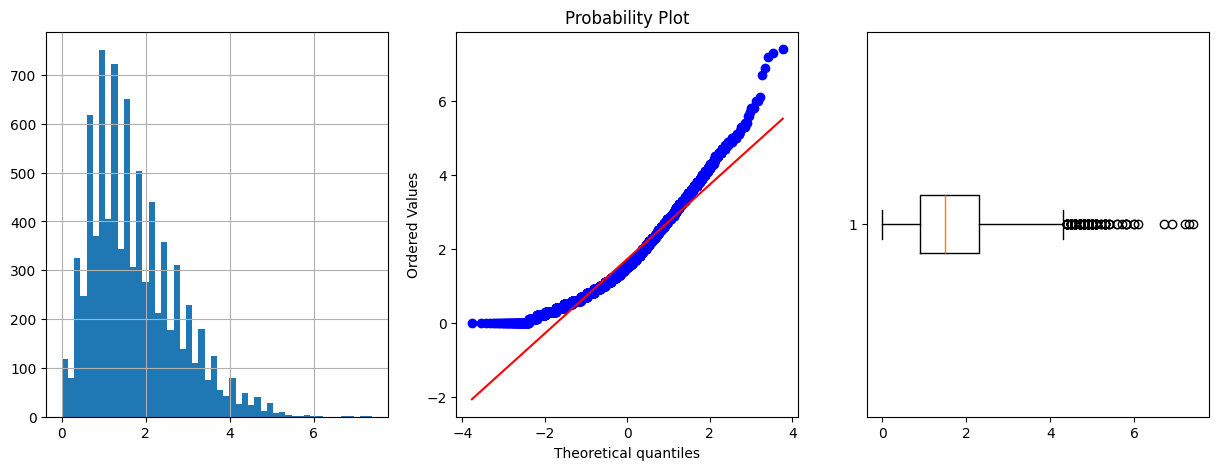

In [12]:
plotvar(df,'Wind speed (m/s)')

# Handling visibility

Two things going on here: negative skew, and a huge number of observations at or close to total visibility (2000).

Two things need to be done:

1. Split the variable into two: visibility issues (yes/no) and low visibility score.

2. Transform negative skew in low visibility score using quantile transformer

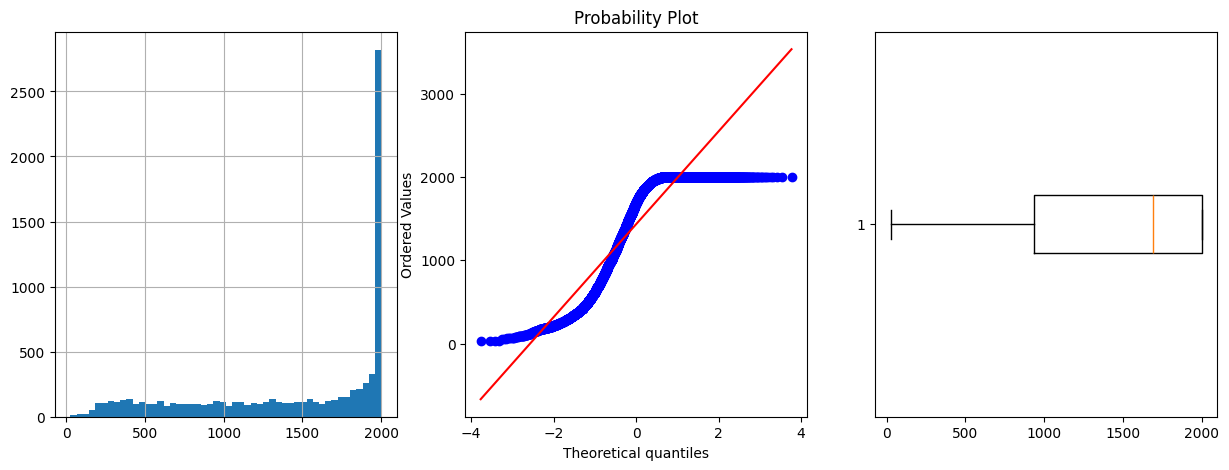

In [13]:
plotvar(df,'Visibility (10m)')

# Handling solar radiation

Lots of observations at 0. Two steps:

1. Split into solar radiation (yes/no) and radiation scale
2. Transform radiation scale's positive skew using quantile transformer

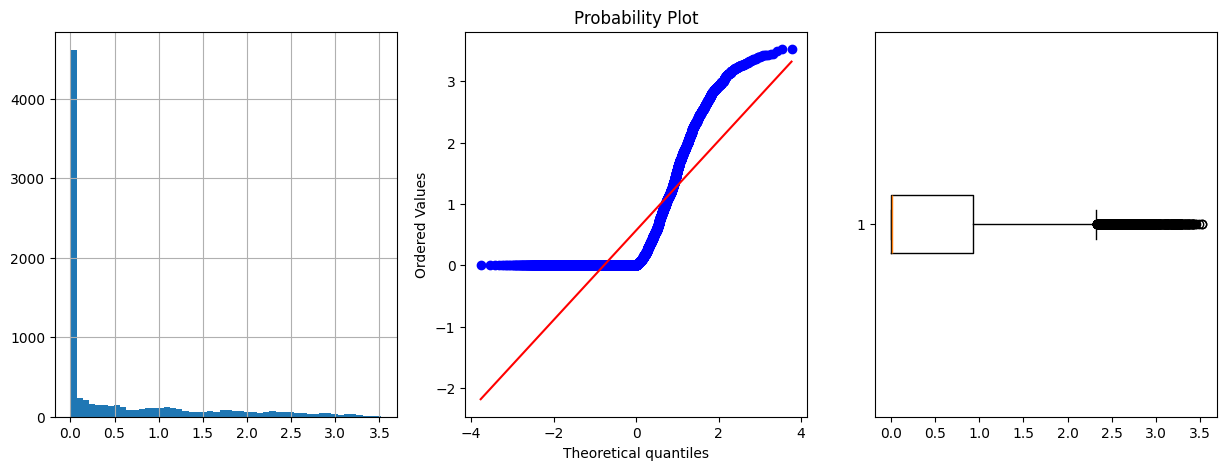

In [14]:
plotvar(df,'Solar Radiation (MJ/m2)')

# Handling rainfall

Lots of observations at 0. Two steps:

1. Split into rainfall (yes/no) and rain volume
2. Adjust rain volume's positive skew using quantile transformer

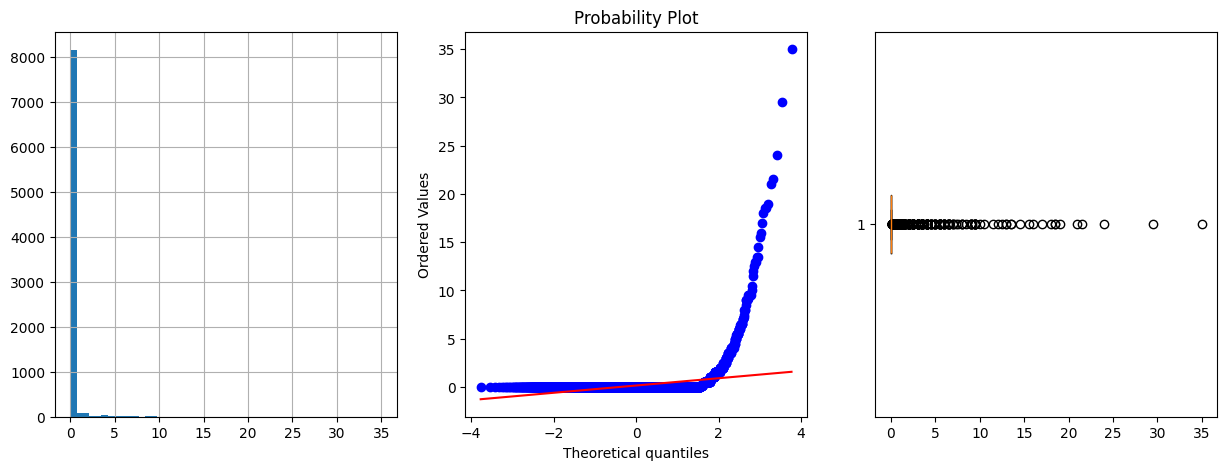

In [15]:
plotvar(df,'Rainfall(mm)')

# Handling snowfall

Lots of observations at 0. Two steps:

1. Split into snowfall (yes/no) and snow volume
2. Adjust snow volume's skew using quantile transformer

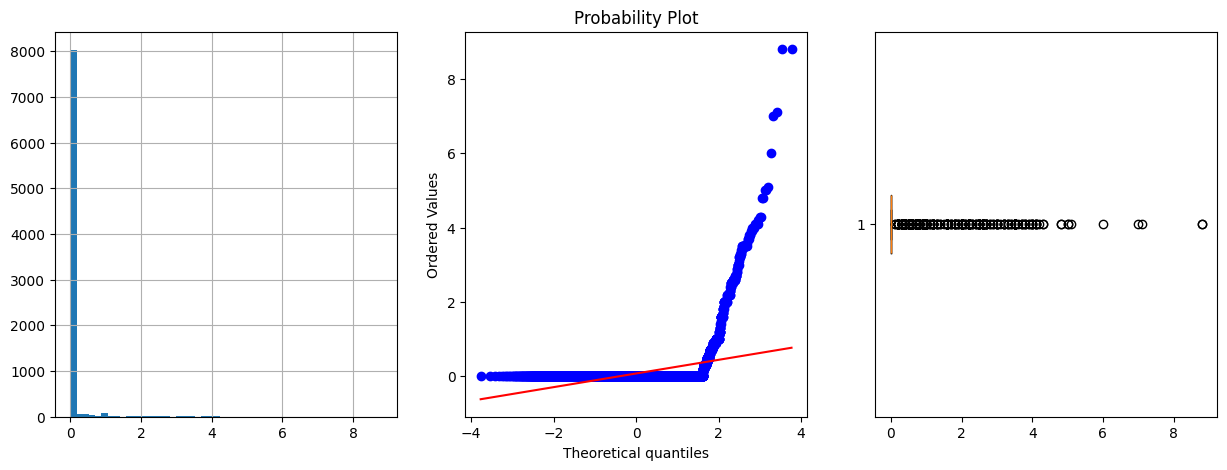

In [16]:
plotvar(df,'Snowfall (cm)')

# Handling rented bike count

Apply cube root to address positive skew.

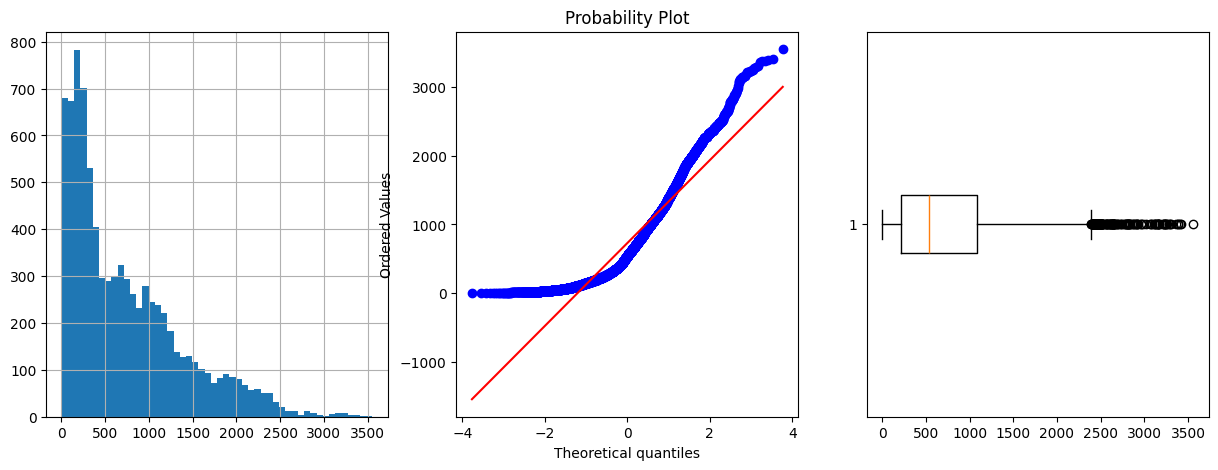

In [17]:
plotvar(df,'rented_bike_count')

# Handling NO2

Looks like error outlier of -1. Delete outlier (replace with 0?)

Square root to fix positive skew.

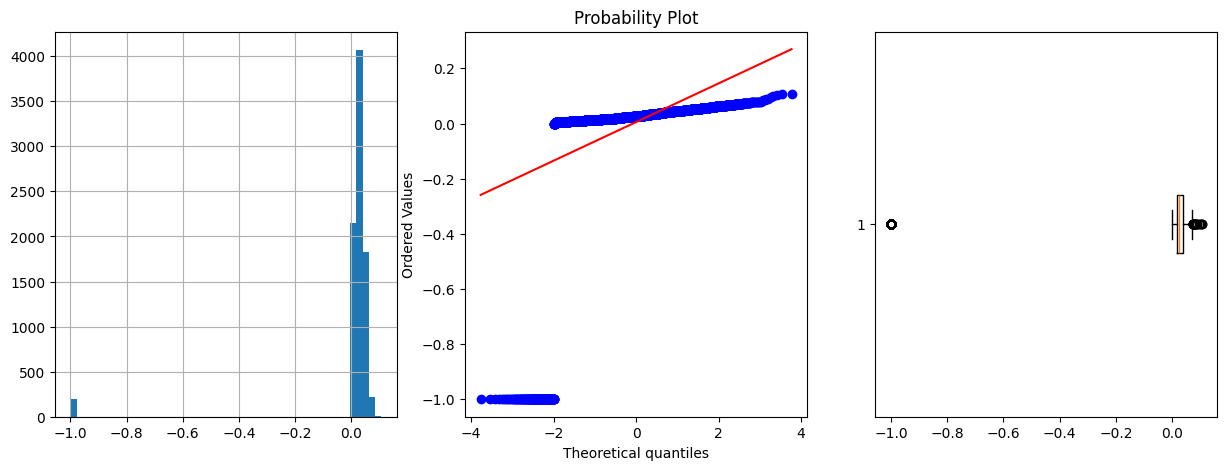

In [18]:
plotvar(df,'NO2')

# Handling PM10

Apply log transformation to fix aggressive positive skew.

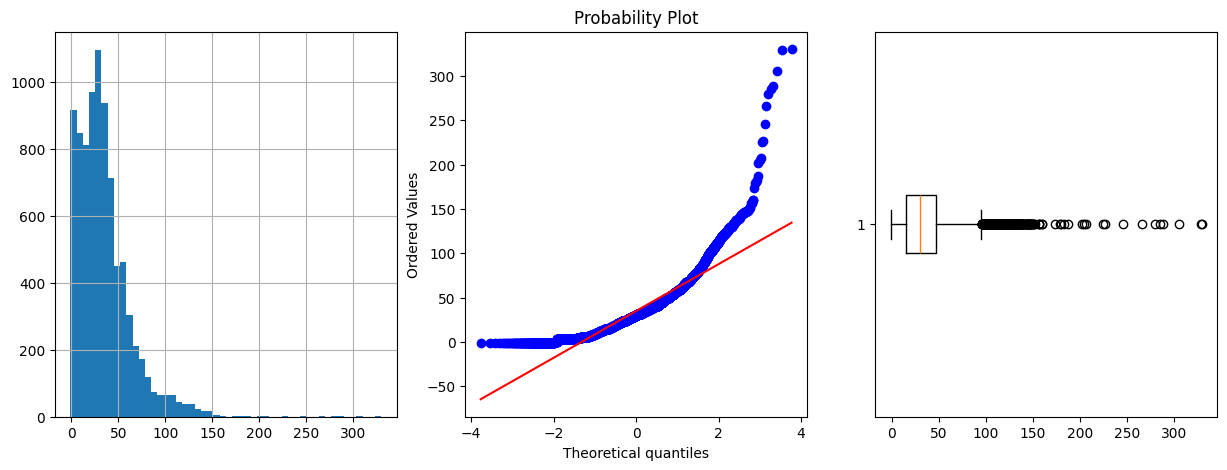

In [19]:
plotvar(df,'PM10')

# Handling PM2.5

Looks like a huge outlier at 6000. Delete outlier, then investigate and handle skew.

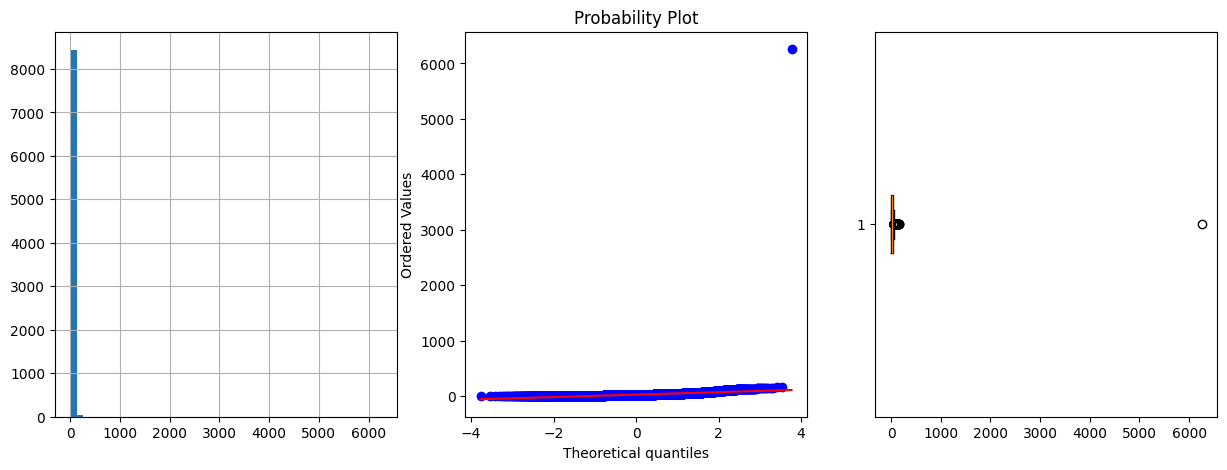

In [20]:
plotvar(df,'PM2.5')

In [ ]:
# Save as csv in Drive
df.to_csv('data/processed/02-processed-for-training.csv', index=False)